In [5]:
import pyshtools as pysh
import matplotlib.pyplot as plt

from cartopy import crs as ccrs
import pygmt
from palettable import scientific as scm
from pyshtools import constants

In [6]:
pysh.utils.figstyle(rel_width=0.75)
%config InlineBackend.figure_format = 'retina' 

In [7]:
clm = pysh.datasets.Moon.GRGM1200B()

In [8]:
clm.info()

kind = 'real'
normalization = '4pi'
csphase = 1
lmax = 1200
GM (m3 / s2) = 4902800122445.3
r0 (m) = 1738000.0
Omega (rad / s) = 2.6617072234847315e-06
error_kind = 'unspecified'
header = ['4.9028001224452998E+12', '1.7380000000000000E+06', '1200', '1200']
header2 = None
name = 'GRGM1200B'
epoch = None


In [10]:
clm.set_omega(constants.Moon.omega.value)
a = constants.Moon.a_orbit.value
f = 0.0012 
#r = constants.Moon.r.value
#u0 = constants.Moon.mass.value

In [11]:
print(pysh.constants.Moon.a_orbit)

  Name   = Semimajor axis of the orbit of the Moon
  Value  = 384399014.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = Williams, J. G., D. H. Boggs, and W. M. Folkner (2013), DE430 lunar orbit, physical librations, and surface coordinates, IOM 335-JW,DB, WF-20130722-016, July 22, 2013, Jet Propul. Lab., Pasadena, Calif.


In [12]:
print(pysh.constants.Moon.mass)

  Name   = Mass of the Moon
  Value  = 7.3457891763930305e+22
  Uncertainty  = 1.6509136027104294e+18
  Unit  = kg
  Reference = Derived from gm_moon and G.


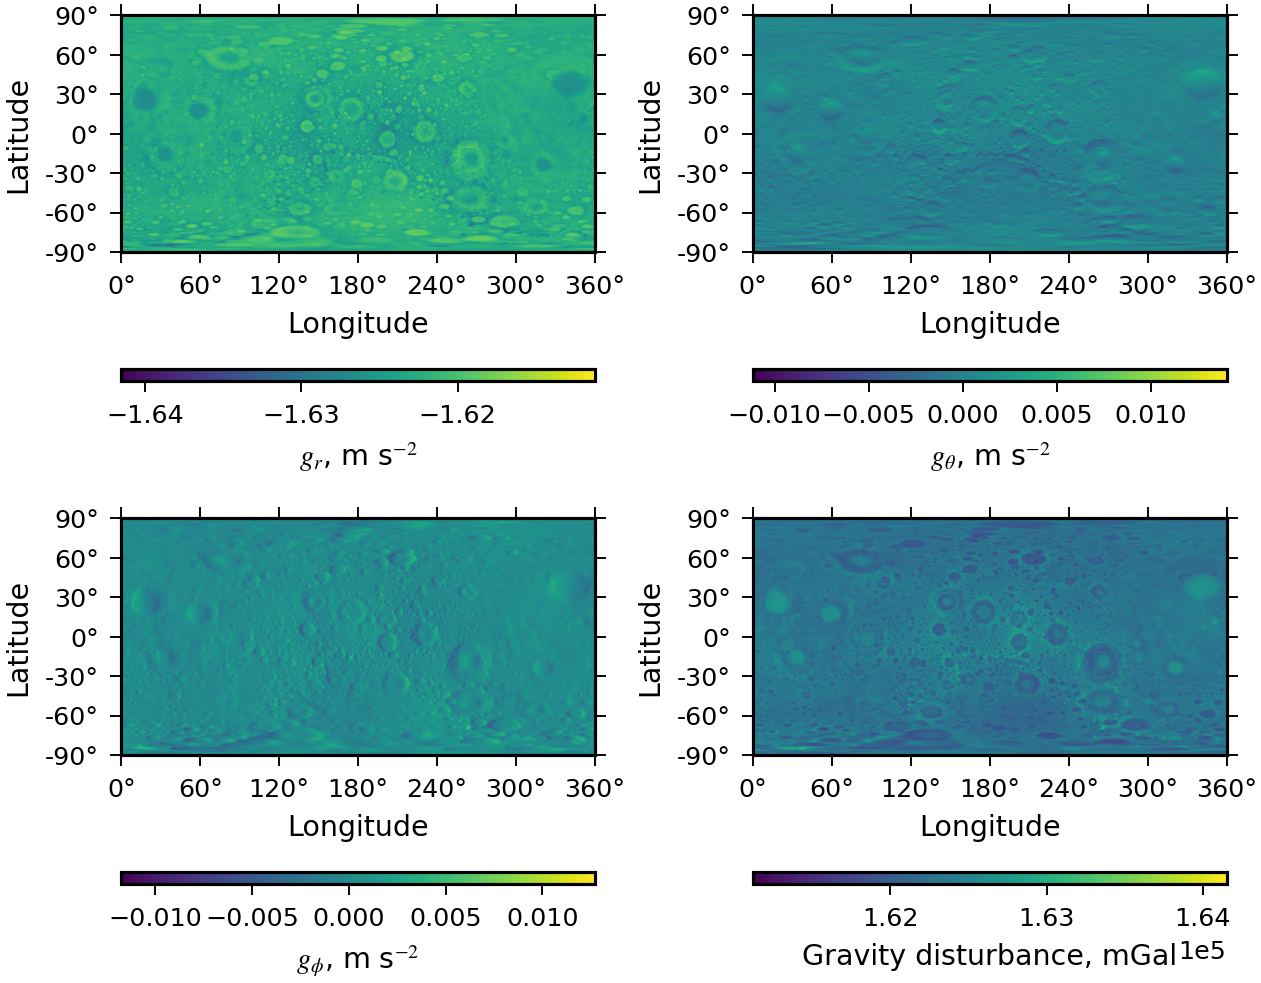

In [21]:
grav = clm.expand(lmax=660)
fig, ax = grav.plot(show=False)

don't know if I need to mention a and f value for moon like they did in Mars.
its example page says that we need 'a'(semi major axis),'f'(flattening) and 'u0' (reference potential) which is required to set angular rotation of the planet but moon is not the planet. so, how to calculate angular rotation rate of our satellite moon? angular rotation rate is required to calculate the normal gravity and geoid of the moon.
The values for a is given and f = 0.0012 (Thank you Gretchen for finding it). Not sure whether u0 is needed for moon or not....mars has reference potential u0 = 12654875.0

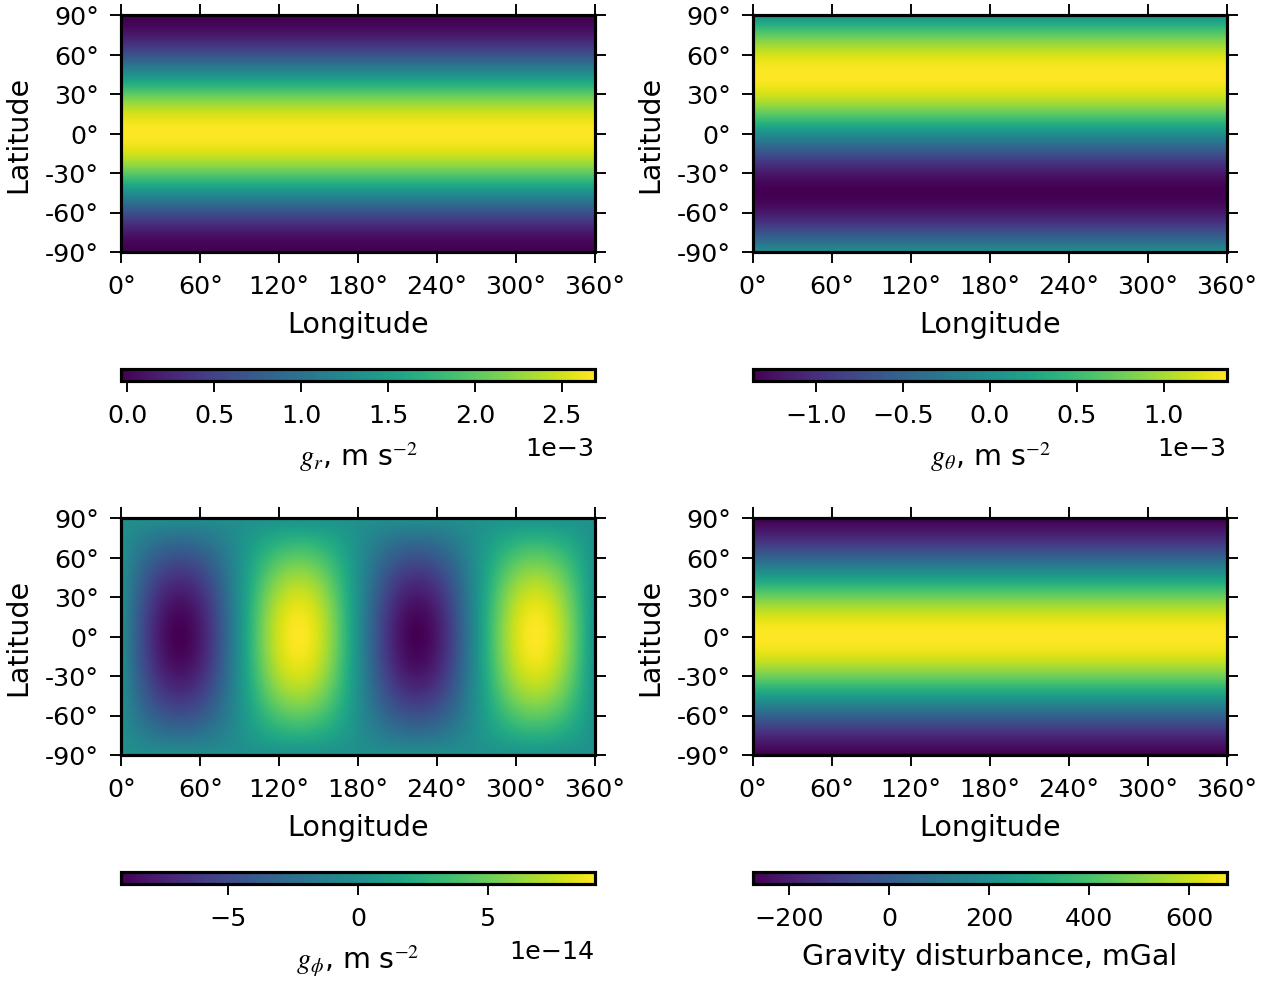

In [22]:
grav = clm.expand(lmax=660, a = a, f=f)
fig1, ax1 = grav.plot(show=False)

The geoid is computed using the geoid() method. 
By specifying the reference potential (in m2/s2), 
the height is calculted with respect to a sphere of reference radius r0.
This method returns an SHGeoid class instance,
where the geoid map is stored internally as an SHGrid class instance. 
Here, we compute the geoid on a grid that has a finer resolution than the potential 
coefficients by specifying the optional variable lmax. 
The reason for doing so is to compare this map directly 
to a higher resolution map of the shape of the planet later.
(I dont the value for reference potential for moon or do I need to calculate it?)
mars has reference potential u0 = 12654875.0

/home/dipika/anaconda3/envs/project1/lib/python3.8/site-packages/pyshtools/shclasses/shgrid.py:1272: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


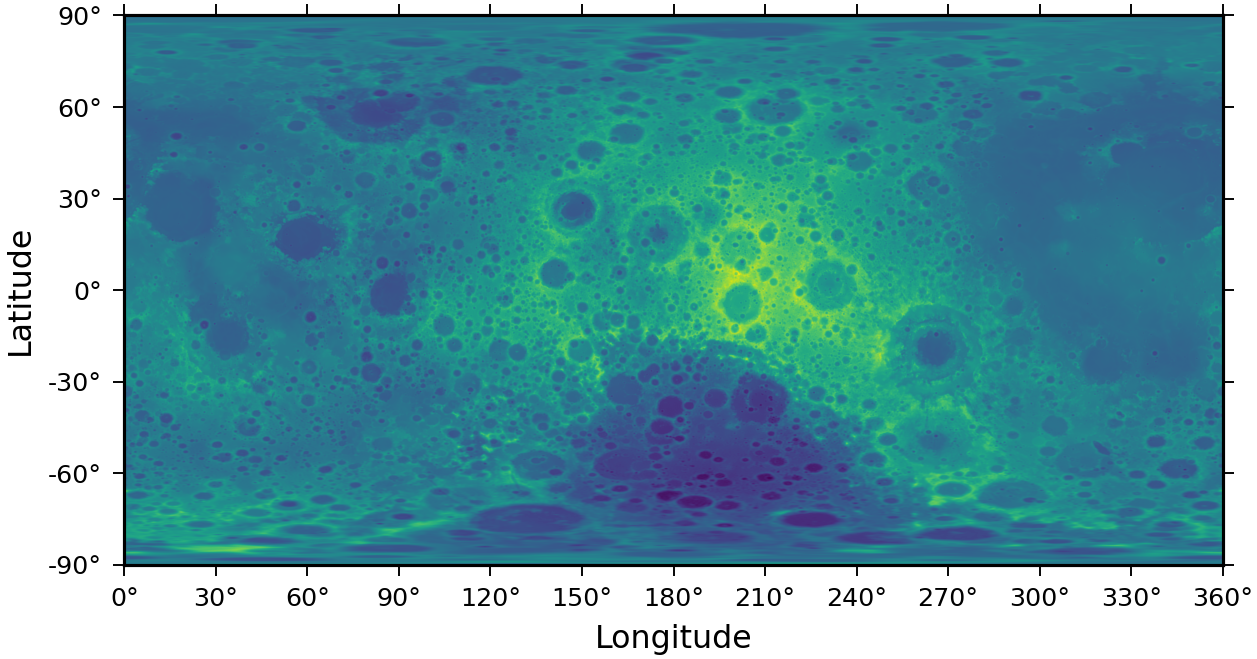

In [24]:
shape = pysh.datasets.Moon.MoonTopo2600p(lmax=660)  # read only the first 719 degrees from the file.
shape_grid = shape.expand(grid='DH2')
fig2, ax2 = shape_grid.plot()